<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-all-motifs" data-toc-modified-id="Get-all-motifs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get all motifs</a></span><ul class="toc-item"><li><span><a href="#Canonical-motifs" data-toc-modified-id="Canonical-motifs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Canonical motifs</a></span></li><li><span><a href="#Other-motifs" data-toc-modified-id="Other-motifs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Other motifs</a></span></li><li><span><a href="#New-C-term-motifs" data-toc-modified-id="New-C-term-motifs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>New C-term motifs</a></span></li><li><span><a href="#Internal-motifs" data-toc-modified-id="Internal-motifs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Internal motifs</a></span><ul class="toc-item"><li><span><a href="#Excursion-most-N-terminal-cysteine-positions-of-internally-prenylated-proteins" data-toc-modified-id="Excursion-most-N-terminal-cysteine-positions-of-internally-prenylated-proteins-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Excursion most N-terminal cysteine positions of internally prenylated proteins</a></span></li></ul></li><li><span><a href="#Save-fasta-file-with-correct-actualized-isoforms-and-motif-information" data-toc-modified-id="Save-fasta-file-with-correct-actualized-isoforms-and-motif-information-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Save fasta file with correct actualized isoforms and motif information</a></span></li><li><span><a href="#Add-new-motif-information-to-dfs-of-identified-proteins" data-toc-modified-id="Add-new-motif-information-to-dfs-of-identified-proteins-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Add new motif information to dfs of identified proteins</a></span></li></ul></li></ul></div>

In [1]:
import sys
import os
import session_info

# Add the '0_functions' folder to sys.path
sys.path.append(os.path.join(os.getcwd(), '..', '0_functions'))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import read_fastafile
from functions import pep_Cterm

In [3]:
# Display session information
session_info.show()

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
datafolder = 'data'
known_proteins_datafolder = '../Known_prenylated_proteins/data'
figures = 'data/figures'
PSSMSearch = 'data/PssmSearch'

In [6]:
# Load data

# All identified prenylated proteins that contain a cysteine
all_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_all.csv'), sep=',')
known_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_known.csv'), sep=',')
novel_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_novel.csv'), sep=',')

# clean FASTA file of all identified proteins
fasta = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'clean_fasta_seqs_identified_prots.csv'), sep=',')

# Master file
master_df = pd.read_csv(os.path.join('..', 'master_df.csv'), sep=',')

# Get all motifs

##### Identified prenylated proteins

In [7]:
F_found = all_found[all_found['Exp_moiety'] == 'S-farnesyl cysteine']
GG_found = all_found[all_found['Exp_moiety'] == 'S-geranylgeranyl cysteine']
F_GG_found = all_found[all_found['Exp_moiety'] == '[S-farnesyl cysteine, S-geranylgeranyl cysteine]']

print('All identified:', len(all_found), ', F only identified:', len(F_found), ', GG only identified:', len(GG_found), ', F & GG identified:', len(F_GG_found))

All identified: 636 , F only identified: 274 , GG only identified: 159 , F & GG identified: 203


##### Known identified prenylated proteins

In [8]:
known_F_found = F_found[F_found['ID'].isin(known_found['ID'])]
known_GG_found = GG_found[GG_found['ID'].isin(known_found['ID'])]
known_F_GG_found = F_GG_found[F_GG_found['ID'].isin(known_found['ID'])]

print('All known identified: ', len(known_found), ', F known identified: ', len(known_F_found), ', GG known identified: ', 
      len(known_GG_found), ', F & GG known identified: ', len(known_F_GG_found), sep='')

All known identified: 78, F known identified: 40, GG known identified: 15, F & GG known identified: 23


##### Novel identified prenylated proteins

In [9]:
novel_F_found = F_found[F_found['ID'].isin(novel_found['ID'])]
novel_GG_found = GG_found[GG_found['ID'].isin(novel_found['ID'])]
novel_F_GG_found = F_GG_found[F_GG_found['ID'].isin(novel_found['ID'])]

print('All novel identified: ', len(novel_found), ', F novel identified: ', len(novel_F_found), ', GG novel identified: ', 
      len(novel_GG_found), ', F & GG novel identified: ', len(novel_F_GG_found), sep='')

All novel identified: 558, F novel identified: 234, GG novel identified: 144, F & GG novel identified: 180


## Canonical motifs

In [10]:
# fasta contains the sequences of all identified proteins

In [11]:
# change sequence isoform of NP1L4! Q99733-2 and PLAK2! Q9Y2D5-8 
fasta[fasta['ID'] == 'Q99733']

,ID,seqID,seq,len
542,Q99733,sp|Q99733|NP1L4_HUMAN,MADHSFSDGVPSDSVEAAKNASNTEKLTDQVMQNPRVLAALQERLDNVPHTPSSYIETLPKAVKRRINALKQLQVRCAHIEAKFYEEVHDLERKYAALYQPLFDKRREFITGDVEPTDAESEWHSENEEEEKLAGDMKSKVVVTEKAAATAEEPDPKGIPEFWFTIFRNVDMLSELVQEYDEPILKHLQDIKVKFSDPGQPMSFVLEFHFEPNDYFTNSVLTKTYKMKSEPDKADPFSFEGPEIVDCDGCTIDWKKGKNVTVKTIKKKQKHKGRGTVRTITKQVPNESFFNFFNPLKASGDGESLDEDSEFTLASDFEIGHFFRERIVPRAVLYFTGEAIEDDDNFEEGEEGEEEELEGDEEGEDEDDAEINPKV,375


In [12]:
fasta[fasta['ID'] == 'Q9Y2D5']

,ID,seqID,seq,len


In [13]:
fasta.loc[542, 'seq'] = "MADHSFSDGVPSDSVEAAKNASNTEKLTDQVMQNPRVLAALQERLDNVPHTPSSYIETLPKAVKRRINALKQLQVRCAHIEAKFYEEVHDLERKYAALYQPLFDKRREFITGDVEPTDAESEWHSENEEEEKLAGDMKSKVVVTEKAAATAEEPDPKGIPEFWFTIFRNVDMLSELVQEYDEPILKHLQDIKVKFSDPGQPMSFVLEFHFEPNDYFTNSVLTKTYKMKSEPDKADPFSFEGPEIVDCDGCTIDWKKGKNVTVKTIKKKQKHKGRGTVRTITKQVPNESFFNFFNPLKASGDGESLDEDSEFTLASDFEIGHFFRERIVPRAVLYFTGEAIEDDDNFEEGEEGEEEELEGDEEGEDEDDAEINPKKEPSQPAECKQQ"

In [14]:
# Add number of cysteines found in whole sequence
fasta['Ccount'] = fasta['seq'].str.count('C')

In [15]:
# Add position of the first C counting from the end of the sequence backwards
fasta['Cpos'] = [-next((pos for pos, amino in enumerate(reversed(seq), 1) if amino == 'C'), 0) for seq in fasta['seq']]

In [16]:
# Pipeline for detecting canonical motifs

aliph_AA = ['A', 'G', 'V', 'I', 'L']

motifs = {
    "CAAX": lambda seq: seq[-4] == 'C' and seq[-3] in aliph_AA and seq[-2] in aliph_AA,
    "CXXX": lambda seq: seq[-4] == 'C',
    "CCC": lambda seq: seq.endswith('CCC'),
    "CXC": lambda seq: seq[-3] == 'C' and seq[-1] == 'C',
    "CCX": lambda seq: seq[-3] == 'C' and seq[-2] == 'C',
    "CC": lambda seq: seq[-2] == 'C' and seq[-1] == 'C',
    "C": lambda seq: seq[-1] == 'C'
}

In [17]:
print('All identified:', len(fasta), '\n')

# Iteratively filter for each motif
for motif_name, condition in motifs.items():
    motif_df = fasta[fasta['seq'].apply(condition)].reset_index(drop=True)

    # annotate motif in df
    motif_df['motif'] = f'{motif_name}'
    
    globals()[f'fasta_{motif_name}'] = motif_df # Create a new variable with the name based on the motif
    
    fasta = fasta[~fasta['ID'].isin(motif_df['ID'])]  # Remove identified sequences
    print(f'{motif_name}:  \t', len(motif_df), '\t(', len(fasta), ' remaining)', sep='')

# Recap
fasta_canon = pd.concat([fasta_CAAX, fasta_CXXX, fasta_CXC, fasta_CCX, fasta_CC, fasta_C], ignore_index=True)
print('\nIdentified proteins with canonical motifs: ', len(fasta_canon), '\t(', len(fasta), ' remaining)', sep='')
print('Check total:', len(fasta_canon) + len(fasta))

All identified: 636 

CAAX:  	30	(606 remaining)
CXXX:  	46	(560 remaining)
CCC:  	0	(560 remaining)
CXC:  	13	(547 remaining)
CCX:  	2	(545 remaining)
CC:  	5	(540 remaining)
C:  	8	(532 remaining)

Identified proteins with canonical motifs: 104	(532 remaining)
Check total: 636


In [18]:
# find if other sequence isoforms of these 532 proteins might have a canonical motif

In [19]:
# check all isoforms of novel identified prenylated proteins
# create uniprot sparql readable input 
up_input = ' '.join([s for s in fasta['ID']])

In [20]:
# FASTA file of all novel identified proteins, downloaded from uniprot 
fasta_iso = read_fastafile(os.path.join(datafolder, 'fasta_files', 'idmapping_2023_10_03_iso_novel.fasta'))

In [21]:
# Clean up the 'ID' column
fasta_iso['ID'] = fasta_iso['ID'].str.split('-').str[0]

In [22]:
# Add number of cysteines found in whole sequence
fasta_iso['Ccount'] = fasta_iso['seq'].str.count('C')

In [23]:
# Add position of the first C counting from the end of the sequence backwards
fasta_iso['Cpos'] = [-next((pos for pos, amino in enumerate(reversed(seq), 1) if amino == 'C'), 0) for seq in fasta_iso['seq']]

In [24]:
len(fasta_iso['ID'].unique())

532

In [25]:
# repeat whole procedure for searching canonical motifs
print('All remaining:', len(fasta_iso['ID'].unique()), '\n')

# Iteratively filter for each motif
for motif_name, condition in motifs.items():
    motif_df = fasta_iso[fasta_iso['seq'].apply(condition)].reset_index(drop=True)

    # annotate motif in df
    motif_df['motif'] = f'{motif_name}'
    
    globals()[f'fasta_iso_{motif_name}'] = motif_df # Create a new variable with the name based on the motif
    
    fasta_iso = fasta_iso[~fasta_iso['ID'].isin(motif_df['ID'])]  # Remove identified sequences
    print(f'{motif_name}:  \t', len(motif_df), '\t(', len(fasta_iso), ' remaining)', sep='')
    
# Recap
fasta_canon_iso = pd.concat([fasta_iso_CAAX, fasta_iso_CXXX, fasta_iso_CXC, fasta_iso_CCX, fasta_iso_CC, fasta_iso_C], ignore_index=True)
print('\nIdentified proteins with canonical motifs: ', len(fasta_canon_iso['ID'].unique()), '\t(', len(fasta_iso['ID'].unique()), ' proteins remaining)', sep='')
print('Check total:', len(fasta_canon_iso['ID'].unique()) + len(fasta_iso['ID'].unique()))

All remaining: 532 

CAAX:  	0	(1182 remaining)
CXXX:  	8	(1153 remaining)
CCC:  	1	(1150 remaining)
CXC:  	0	(1150 remaining)
CCX:  	0	(1150 remaining)
CC:  	0	(1150 remaining)
C:  	6	(1136 remaining)

Identified proteins with canonical motifs: 13	(518 proteins remaining)
Check total: 531


In [26]:
# Manually re-add CCC internal to fasta_iso
fasta_iso = pd.concat([fasta_iso, fasta_iso_CCC])

In [27]:
# found proteins that have a canonical motif in their isoform
fasta_canon_iso

,ID,seqID,seq,len,Ccount,Cpos,motif
0,O15400,sp|O15400-2|STX7_HUMAN,MSYTPGVGGDPAQLAQRISSNIQKITQCSVEIQRTLNQLGTPQDSPELRQQLQQKQQYTNQLAKETDKYIKEFGSLPTTPSEQRQRKIQKDRLVAEFTTSLTNFQKVQRQAAEREKEFVARVRASSRVSGSFPEDSSKERNLVSWESQTQPQVQVQDEEITEDDLRLIHERESSIRQLEADIMDINEIFKDLGMMIHEQGDVIDSIEANVENAEVHVQQANQQLSRAADYQKKDSCMLM,239,2,-4,CXXX
1,P16298,sp|P16298-2|PP2BB_HUMAN,MAAPEPARAAPPPPPPPPPPPGADRVVKAVPFPPTHRLTSEEVFDLDGIPRVDVLKNHLVKEGRVDEEIALRIINEGAAILRREKTMIEVEAPITVCGDIHGQFFDLMKLFEVGGSPANTRYLFLGDYVDRGYFSIEHVLGTEDISINPHNNINECVLYLWVLKILYPSTLFLLRGNHECRHLTEYFTFKQECKIKYSERVYEACMEAFDSLPLAALLNQQFLCVHGGLSPEIHTLDDIRRLDRFKEPPAFGPMCDLLWSDPSEDFGNEKSQEHFSHNTVRGCSYFYNYPAVCEFLQNNNLLSIIRAHEAQDAGYRMYRKSQTTGFPSLITIFSAPNYLDVYNNKAAVLKYENNVMNIRQFNCSPHPYWLPNFMDVFTWSLPFVGEKVTEMLVNVLSICSDDELMTEGEDQFDGSAAARKEIIRNKIRAIGKMARVFSVLREESESVLTLKGLTPTGMLPSGVLAGGRQTLQSGNDVMQLAVPQMDWGTPHSFANNSHNACREFLLFFSSCLSS,514,13,-4,CXXX
2,P28907,sp|P28907-2|CD38_HUMAN,MANCEFSPVSGDKPCCRLSRRAQLCLGVSILVLILVVVLAVVVPRWRQQWSGPGTTKRFPETVLARCVKYTEIHPEMRHVDCQSVWDAFKGAFISKHPCNITEEDYQPLMKLGTQTVPCNKK,122,8,-4,CXXX
3,Q14697,sp|Q14697-3|GANAB_HUMAN,MAAVAAVAARRRRSWASLVLAFLGVCLGITLAVDRSNFKTCEESSFCKCCWC,52,6,-1,CXXX
4,Q5T9A4,sp|Q5T9A4-2|ATD3B_HUMAN,MCLCRPLLPQRAQYQDKLARQRYEDQLKQQQLLNEENLRKQEESVQKQEAMRRATVEREMELRHKNEMLRVETEARARAKAERENADIIREQIRLKASEHRQTVLESIRTAGTLFGEGFRAFVTDRDKVTATVNIFIKQGWQVAERQHVGASWSPRSCPCRLCTAL,166,5,-4,CXXX
5,Q7RTN6,sp|Q7RTN6-2|STRAA_HUMAN,MSFLTNDASSESIASFSKQEVMSSFLPEGGCYELLTVIGKGFEDLMTVNLARYKPTGEYVTVRRINLEACSNEMVTFLQGELHVSKLFNHPNIVPYRATFIADNELWVVTSFMAYGSAKDLICTHFMDGMNELAIAYILQGVLKALDYIHHMGYVHRSVKASHILISVDGKVYLSGLRSNLSMISHGQRQRVVHDFPKYSVKVLPWLSPEVLQQNLQGYDAKSDIYSVGITACELANGHVPFKDMPATQMLLEKLNGTVPCLLDTSTIPAEELTMSPSRSVANSGLSDSLTTSTPRPSNGDSPSHPYHRTFSPHFHHFVEQCLQRNPDARYPCWPGPGLRESRGCSGG,348,8,-4,CXXX
6,Q7Z434,sp|Q7Z434-3|MAVS_HUMAN,MPFAEDKTYKYICRNFSNFCNVDVVEILPYLPCLTARDQDRLRATCTLSGNRDTLWHLFNTLQLPTWAGEETPGGQSSGRGLDFSSLTSGAVWLWQMSDFWSCFSTWTVSIWLILHWVLLRLNLQVFAKCLAQSKWPLLLPSLSCPTW,148,7,-4,CXXX
7,Q9NQ55,sp|Q9NQ55-3|SSF1_HUMAN,MGQSGRSRHQKRARAQAQLRNLEAYAANPHSFVFTRGCTGRNIRQLSLDVRRVMEPLTASRLQVRKKNSLKDCVAVAGPLGVTHFLILSKTETNVYFKLMRLPGGPTLTFQVKKYSLVRDVVSSLRRHRMHEQQFAHPPLLVLNSFGPHGMHVKLMATMFQNLFPSINVHKVNLNTIKRCLLIDYNPDSQELDFRHYSIKVVPVGASRGMKKLLQEKFPNMSRLQDISELLATGAGLSESEAEPDGDHNITELPQAVAGRGNMRAQQSAVRLTEIGPRMTLQLIKVQEGVGEGKVMFHSFVSKTEEELQAILEAKEKKLRLKAQRQAQQAQNVQRKQEQREAHRKKSLEGMKKARVGGSDEEASGIPSRTASLELGEDDDEQEDDDIEYFCQAVGEAPSEDLFPEAKQKRLAKSPGRKRKRWEMDRGRGRLCDQKFPKTKDKSQGAQVPSPALPTSWQLPTTNSVGSRGTSCGPYWWLSSWWPWPAMAWPCTASASGSSAHGTPPWSSLSSWQSATCSAP,520,8,-4,CXXX
8,P53985,sp|P53985-2|MOT1_HUMAN,MPPAVGGPVGYTPPDGGWGWAVVIGAFISIGFSYAFPKSITVFFKEIEGIFHATTSEVSWISSIMLAVMYGGGPISSILVNKYGSRIVMIVGGCLSGCGLIAASFCNTVQQLYVCIGVIGGLGLAFNLNPALTMIGKYFYKRRPLANGLAMAGSPVFLCTLAPLNQVFFGIFGWRGSFLILGGLLLNCCVAGALMRPIGPKPTKAGKDKSKASLEKAGKSGVKKDLHDANTDLIGRHPKQEKRSVFQTINQFLDLTLFTHRGFLLYLSGNVIMFFGLFAPLVFLSSYGKSQHYSSEKSAFLLSILAFVDMVARPSMGLVANTKPIRPRIQYFFAASVVANGVCHMLAPLSTTYVGFCVYAGFFGFAFGWLSSVLFETLMDLVGPQRFSSAVGLVTIVECCPVLLGPPLLGIVYLPTNVGLLQNKHVRWEC,430,12,-1,C
9,Q13190,sp|Q13190-3|STX5_HUMAN,MSCRDRTQEFLSACKSLQTRQNGIQTNKPALRAVRQRSEFTLMAKRIGKDLSNTFAKLEKLTILAKRKSLFDDKAVEIEELTYIIKQDINSLNKQIAQLQDFVRAKGSQSGRHLQTHSNTIVVSLQSKLASMSNDFKSVLEVRTENLKQQRSRREQFSRAPVSALPLAPNHLGGGAVVLGAESHASKDVAIDMMDSRTSQQLQLIDEQDSYIQSRADTMQNIESTIVELGSIFQQLAHMVKEQEETIQSVLLFPLLPALSPGSTRTC,267,3,-1,C


In [28]:
# for double entries, remove the isoform with less total cysteines
fasta_canon_iso = fasta_canon_iso.drop([fasta_canon_iso.index[10]]).reset_index(drop=True)

In [29]:
# Add these new found proteins with canonical motif to found_canon
found_canon = pd.concat([fasta_canon, fasta_canon_iso], ignore_index=True).reset_index(drop=True)

print(len(found_canon), 'identified proteins with canonical motif, of which', len(fasta_canon_iso), 'are isoforms.')

117 identified proteins with canonical motif, of which 13 are isoforms.


In [30]:
# update fasta
# remove all protein sequence forms
fasta = fasta.loc[~fasta['ID'].isin(found_canon['ID'])]
# re-add only the needed isoforms with canonical motif
fasta = pd.concat([fasta, found_canon], ignore_index=True).reset_index(drop=True)

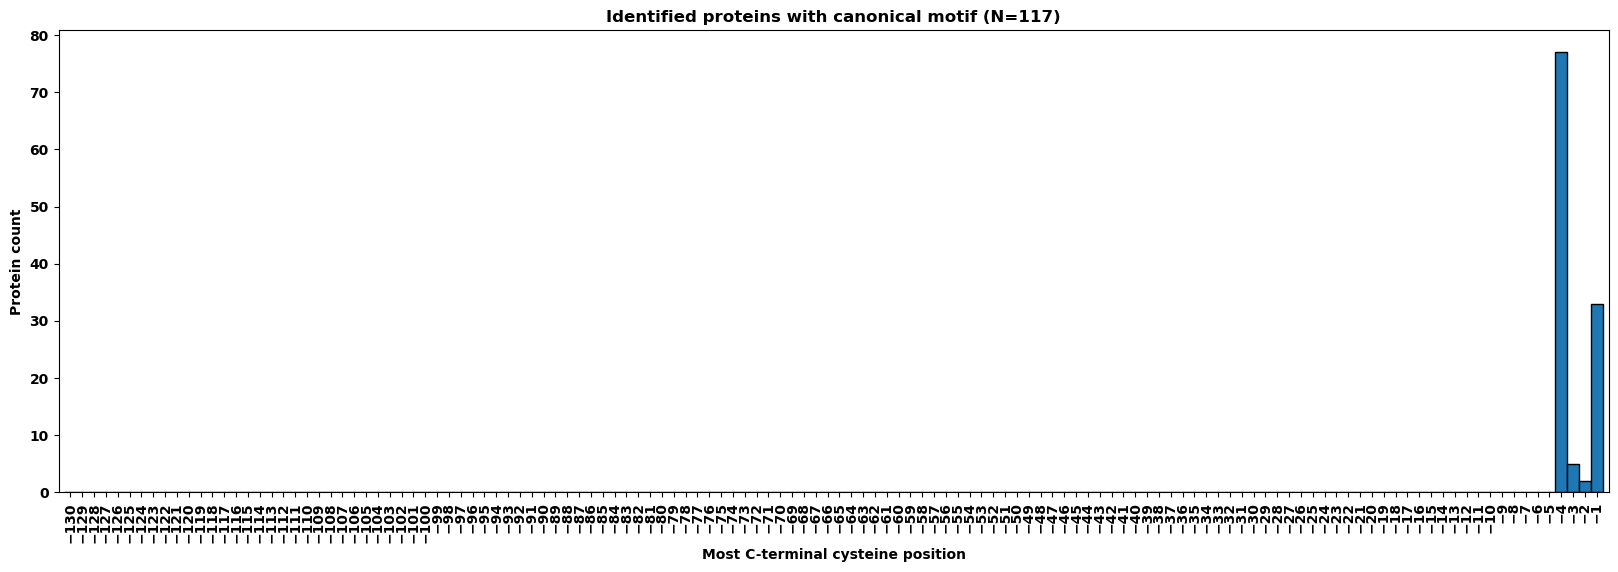

In [31]:
# Histogram of canonical motifs

# position of the first C counting from the end of the sequence backwards
# for the bar plots only
pos = found_canon['Cpos']

# Filter data within the range from -100 to -1
filtered_data = [x for x in pos if -130 <= x <= -1]

# Specify the desired bin edges
bin_edges = list(range(-130, 1))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('Most C-terminal cysteine position')
plt.ylabel('Protein count')
plt.title(f'Identified proteins with canonical motif (N={len(pos)})')

# Customize x-axis ticks and labels
plt.xticks(range(-130, 0), rotation=90)

# Set x-axis limits to match the data range
plt.xlim(-131, -0)

# Show the plot
plt.show()

## Other motifs

In [32]:
# Continue with proteins that have no canonical motif in any sequence isoform
print('Found proteins with other motif:', len(fasta_iso['ID'].unique()), 'proteins,', len(fasta_iso), 'sequences')

Found proteins with other motif: 519 proteins, 1137 sequences


In [33]:
# check in UniProt for chains that may end in a canonical motif, use only canonical sequences ID
up_input = ' '.join(['uniprotkb:' + str(s) for s in fasta_iso['ID'].unique()])

In [34]:
all_chains = pd.read_csv(os.path.join(datafolder, 'UniProt_SPARQL_queries', 'up_output_chains_03.10.23.csv'), sep=';')

In [35]:
# drop rows with NaN
all_chains =  all_chains.dropna().reset_index(drop=True)

In [36]:
# repeat whole procedure for searching canonical motifs
all_chains['Ccount'] = all_chains['seq'].str.count('C')

# annotate the position of the first C counting from the end of the sequence backwards
all_chains['Cpos'] = [-next((pos for pos, amino in enumerate(reversed(seq), 1) if amino == 'C'), 0) for seq in all_chains['seq']]

# annotate the second C counting from the back of the fasta_found_new sequence
count = 0
secondC = []

for i in range(len(all_chains)):
    if all_chains['Ccount'][i] > 1:
        for pos, amino in enumerate(reversed(all_chains['seq'][i])):
            if amino == 'C':
                count += 1
            if count == 2:
                secondC.append([i, -(pos+1)])
                count = 0
                break

secondC = pd.DataFrame(secondC, columns=['idx','secondC']).set_index('idx')
all_chains = all_chains.join(secondC)
all_chains['secondC'] = all_chains['secondC'].astype('Int64')

all_chains['Cpos'] = all_chains['Cpos'].astype(object)

for i in all_chains.index.values:
    if pd.isna(all_chains['secondC'][i]) == False:
        if (all_chains['secondC'][i]) - (all_chains['Cpos'][i]) >= -2:
            all_chains["Cpos"][i] = [all_chains['secondC'][i], all_chains['Cpos'][i]]

all_chains = all_chains.drop(columns=['secondC'])

# add column with motif for motifs that correspond to the gold standard found in UniProt
for i, pos in enumerate(all_chains['Cpos']):
    if pos == [-3, -1]:
        all_chains.at[i, 'motif'] = 'CXC'
    if pos == [-2, -1]:
        all_chains.at[i, 'motif'] = 'CC'
    if pos == [-4, -3]:
        all_chains.at[i, 'motif'] = 'CCXX'
    if pos == [-5, -4]:
        all_chains.at[i, 'motif'] = 'CCXXX'
    if pos == [-3, -2]:
        all_chains.at[i, 'motif'] = 'CCX'
    else:
        all_chains['motif'] = np.nan
        
# unpack Cs in close proximity and run search for -4 and -1. It doesn't matter if we have [-6, -4]. It still counts as canonical CXXX
for i, row in all_chains.iterrows():
    if pd.isna(row['motif']) and isinstance(row['Cpos'], list):
        all_chains.at[i, 'Cpos'] = row['Cpos'][1]
        
# add column with motif for motifs that correspond to the gold standard found in UniProt
for i, pos in enumerate(all_chains['Cpos']):
    if pos == -4:
        all_chains.at[i, 'motif'] = 'CXXX'
    if pos == -1:
        all_chains.at[i, 'motif'] = 'C'

C:\Users\ale\AppData\Local\Temp\ipykernel_1548\3009046649.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_chains["Cpos"][i] = [all_chains['secondC'][i], all_chains['Cpos'][i]]


In [37]:
# canonical motif in any chain
all_chains[~all_chains['motif'].isna()]

,ID,seq,Ccount,Cpos,motif


In [38]:
# back to the normal sequences

In [39]:
print('Before removing doubles: ', len(fasta_iso))

Before removing doubles:  1137


In [40]:
# proteins that have the same ID, pep, Ccount and Cpos are regarded as double, keep first one
fasta_found_double = fasta_iso[fasta_iso.duplicated(subset=['ID', 'Ccount', 'Cpos'])]

# -> remove them from fasta_found_iso
# the first occurence is kept, the df contains only the doubles
# merge and don't keep dublicates to remove them fro df
fasta_iso = pd.concat([fasta_iso, fasta_found_double], ignore_index=True).drop_duplicates(keep=False).reset_index(drop=True)

In [41]:
print('After removing doubles: ', len(fasta_iso))

After removing doubles:  935


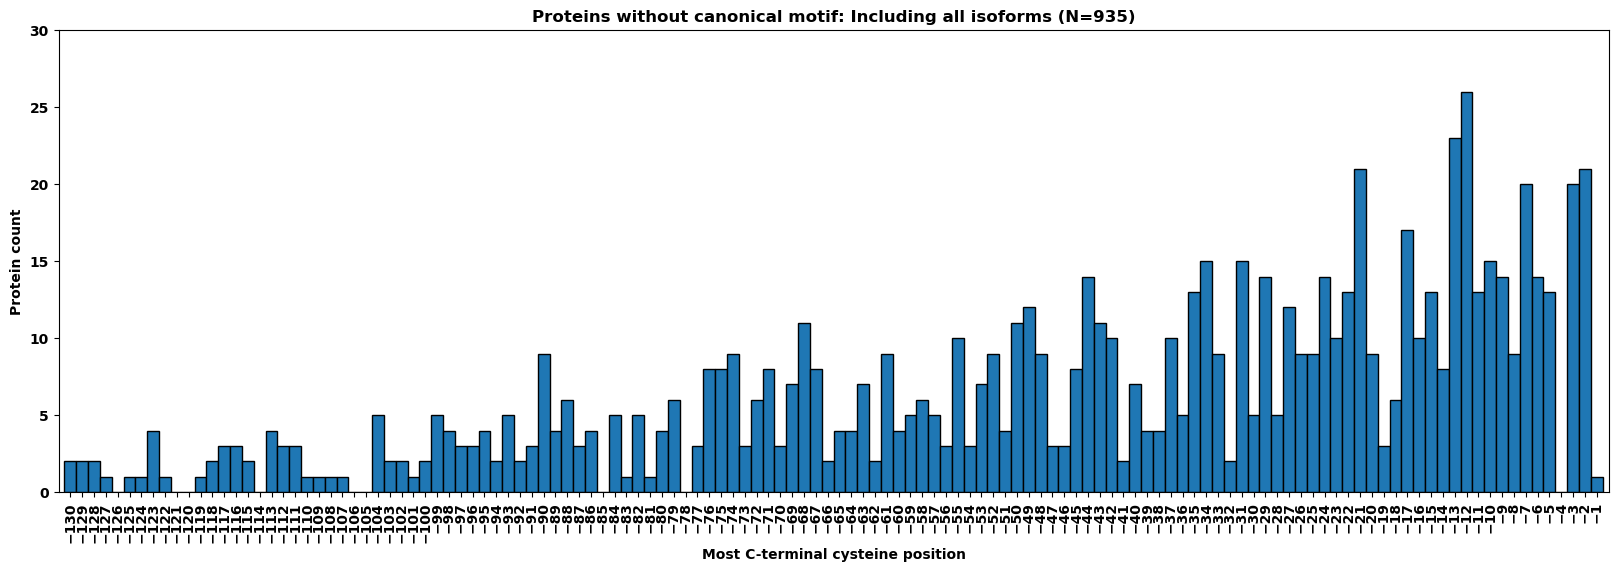

In [42]:
# Histogram of most C-terminal cysteine positions, including all isoforms

# Cpos is the most C-terminal cysteine
pos = fasta_iso['Cpos'].tolist()

# Filter data within the range from -100 to -1
filtered_data = [x for x in pos if -130 <= x <= -1]

# Specify the desired bin edges
bin_edges = list(range(-130, 1))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('Most C-terminal cysteine position')
plt.ylabel('Protein count')
plt.title(f'Proteins without canonical motif: Including all isoforms (N={len(pos)})')

# Customize x-axis ticks and labels
plt.xticks(range(-130, 0), rotation=90)

# Set x-axis limits to match the data range
plt.xlim(-131, -0)
plt.ylim(0, 30)

# Show the plot
plt.show()

In [43]:
# occurences of sequences per protein ID
v = fasta_iso.ID.value_counts()

# proteins that don't have an isoform sequence alternative
fasta_found_no_alternative = fasta_iso[~fasta_iso.ID.isin(v.index[v.gt(1)])].reset_index(drop=True)
print('Found proteins no canonical motif, no alternative isoforms:', len(fasta_found_no_alternative))

# proteins with more than one isoforms alternatives
fasta_found_iso = fasta_iso[fasta_iso.ID.isin(v.index[v.gt(1)])].reset_index(drop=True)
print('Found proteins no canonical motif, multiple alternative isoforms:', len(fasta_found_iso['ID'].unique()), 'proteins,', len(fasta_found_iso), 'possible sequences')

Found proteins no canonical motif, no alternative isoforms: 263
Found proteins no canonical motif, multiple alternative isoforms: 256 proteins, 672 possible sequences


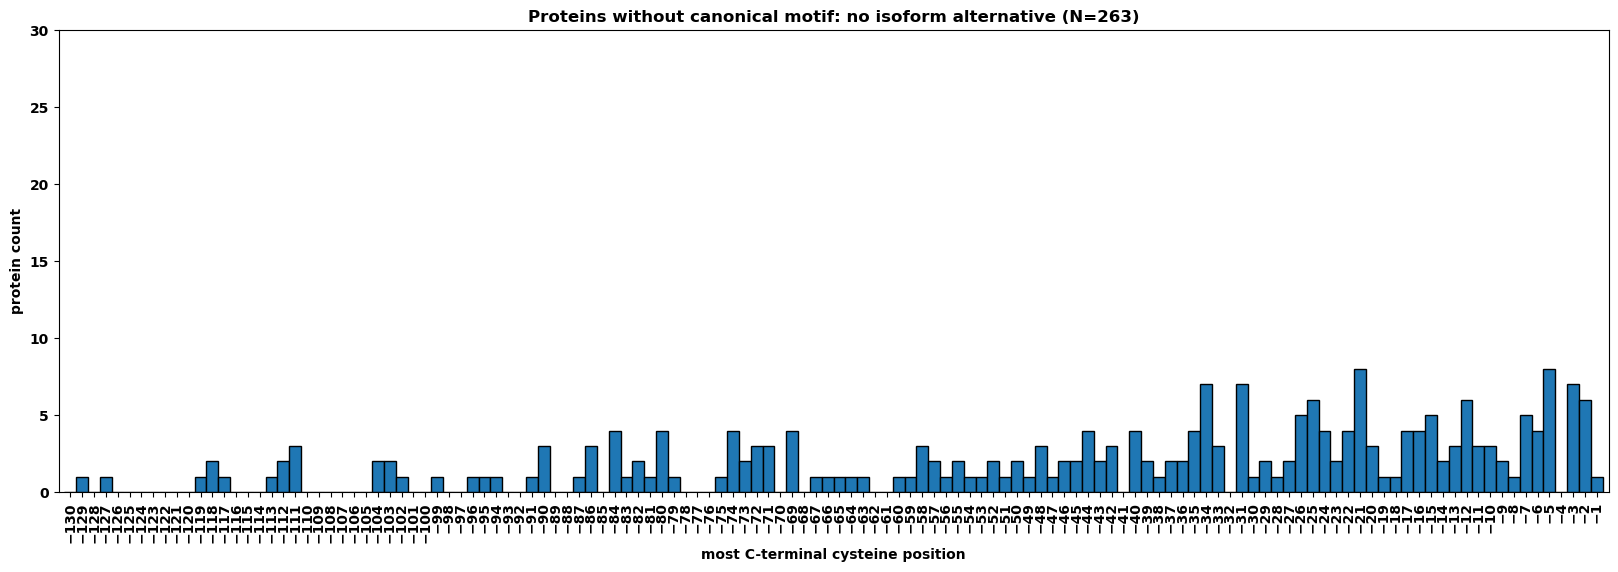

In [44]:
# Histogram of one most C-terminal cysteine position per protein, no alternative, no doubles

# Cpos is the most C-terminal cysteine
pos = fasta_found_no_alternative['Cpos'].tolist()

# Filter data within the range from -30 to -1
filtered_data = [x for x in pos if -130 <= x <= -1]

# Specify the desired bin edges
bin_edges = list(range(-130, 1))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('most C-terminal cysteine position')
plt.ylabel('protein count')
plt.title(f'Proteins without canonical motif: no isoform alternative (N={len(pos)})')

# Set custom x-tick values and labels
plt.xticks(range(-130, 0))
plt.xticks(rotation=90)

# Set x-axis limits to match the data range
plt.xlim(-131, -0)
plt.ylim(0, 30)

plt.show()

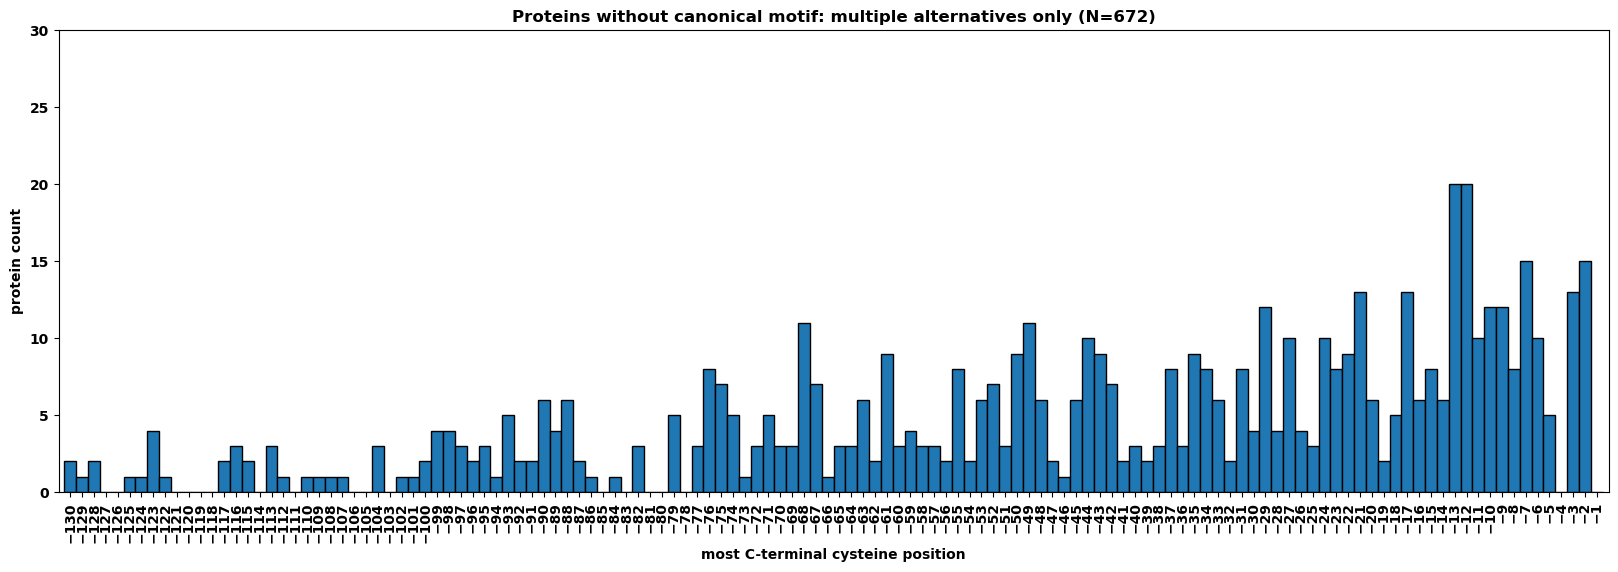

In [45]:
# Histogram of one most C-terminal cysteine position per protein, multiple alternatives only

# Cpos is the most C-terminal cysteine
pos = fasta_found_iso['Cpos'].tolist()

# Filter data within the range from -30 to -1
filtered_data = [x for x in pos if -130 <= x <= -1]

# Specify the desired bin edges
bin_edges = list(range(-130, 1))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('most C-terminal cysteine position')
plt.ylabel('protein count')
plt.title(f'Proteins without canonical motif: multiple alternatives only (N={len(pos)})')

# Set custom x-tick values and labels
plt.xticks(range(-130, 0))
plt.xticks(rotation=90)

# Set x-axis limits to match the data range
plt.xlim(-131, 0)
plt.ylim(0, 30)

plt.show()

## New C-term motifs

In [46]:
# Previously found CCC
fasta_iso[fasta_iso['motif'] == 'CCC']

,ID,seqID,seq,len,Ccount,Cpos,motif
934,Q8IZ83,sp|Q8IZ83-2|A16A1_HUMAN,MAATRAGPRAREIFTSLEYGPVPESHACALAWLDTQDRCLGHYVNGKWLKPEHRNSVPCQDPITGENLASCLQAQAEDVAAAVEAARMAFKGWSAHPGVVRAQHLTRLAEVIQKHQRLLWTLESLVTGRAVREVRDGDVQLAQQLLHYHAIQASTQEEALAGWEPMGVIGLILPPTFSFLEMMWRICPALAVGCTVVALVPPASPAPLLLAQLAGELGPFPGILNVLSGPASLVPILASQPGIRKVAFCGAPEVPSGQGSWRNAAGGRKAPPAAELGGVPRKGVPFDGAWRESVRSWAWRWGRSRCCC,308,10,-1,CCC


In [47]:
# Out of all sequence forms choose those with new C-term
found_newCterm = fasta_iso[fasta_iso['Cpos'].isin([-5, -3, -2])].reset_index(drop=True)

In [48]:
print('New C-term motif:', len(found_newCterm), 'isoforms,',  len(found_newCterm['ID'].unique()), 'proteins')

New C-term motif: 54 isoforms, 43 proteins


In [49]:
# keep canonical sequence, if present
found_newCterm_no_iso = found_newCterm.loc[~found_newCterm['seqID'].str.contains('-')]

# remove all entries that are not isoforms
found_newCterm = found_newCterm[~found_newCterm['ID'].isin(found_newCterm_no_iso['ID'])]

# re-add only canonical sequence form
found_newCterm = pd.concat([found_newCterm, found_newCterm_no_iso], ignore_index=True).reset_index(drop=True)

In [50]:
# Mismatch sequence number and protein ID number?
print('New C-term motif:', len(found_newCterm), 'isoforms,',  len(found_newCterm['ID'].unique()), 'proteins')

New C-term motif: 46 isoforms, 43 proteins


In [51]:
# choose! can only keep one
found_newCterm[found_newCterm['ID'].isin(['Q93038'])]

,ID,seqID,seq,len,Ccount,Cpos,motif
12,Q93038,sp|Q93038-12|TNR25_HUMAN,MEQRPRGCAAVAAALLLVLLGARAQGGTRSPRCDCAGDFHKKIGLFCCRGCPAGHYLKAPCTEPCGNSTCLVCPQDTFLAWENHHNSECARCQACDEQASQVALENCSAVADTRCGCKPGWFVECQVSQCVSSSPFYCQPCLDCGALHRHTRLLCSRRDTDCGTCLPGFYEHGDGCVSCPTPPPSLAGAPWGAVQSAVPLSVAGGRVGGVLGMRVGELGWTEGRRVRRGATTQHPPAAFSVLGPGAPGWPCGPPPAWGHPDLHIPPLLASQAPGYCR,277,28,-2,NaN
13,Q93038,sp|Q93038-4|TNR25_HUMAN,MEQRPRGCAAVAAALLLVLLGARAQGGTRSPRCDCAGDFHKKIGLFCCRGCPAGHYLKAPCTEPCGNSTCLVCPQDTFLAWENHHNSECARCQACDEQASQVALENCSAVADTRCGCKPGWFVECQVSQCVSSSPFYCQPCLDCGALHRHTRLLCSRRDTDCGTCLPGFYEHGDGCVSCPTSTLGSCPERCAAVCGWRQSRWCAGNARGRTGMDRGEAGEEGGNHPTPTSCFQCSGSRCSWLALWSPSCLGPP,253,34,-5,NaN
14,Q93038,sp|Q93038-5|TNR25_HUMAN,MEQRPRGCAAVAAALLLVLLGARAQGGTRSPRCDCAGDFHKKIGLFCCRGCPAGHYLKAPCTEPCGNSTCLVCPQDTFLAWENHHNSECARCQACDEQASQVALENCSAVADTRCGCKPGWFVECQVSQCVSSSPFYCQPCLDCGALHRHTRLLCSRRDTDCGTCLPGFYEHGDGCVSCPT,181,26,-3,NaN
15,Q93038,sp|Q93038-6|TNR25_HUMAN,MEQRPRGCAAVAAALLLVLLGARAQGGTRSPRCDCAGDFHKKIGLFCCRGCPAASQVALENCSAVADTRCGCKPGWFVECQVSQCVSSSPFYCQPCLDCGALHRHTRLLCSRRDTDCGTCLPGFYEHGDGCVSCPT,136,19,-3,NaN


In [52]:
# keep isoform with most cysteines
found_newCterm = found_newCterm.drop(index=[12, 14, 15]).reset_index(drop=True)

In [53]:
# add new C-term motif 
for i, pos in enumerate(found_newCterm['Cpos']):
    if pos == -5:
        found_newCterm.at[i, 'motif'] = 'CXXXX'
    elif pos == -3:
        found_newCterm.at[i, 'motif'] = 'CXX'
    elif pos == -2:
        found_newCterm.at[i, 'motif'] = 'CX'

In [54]:
# Check
print('New C-term motif:', len(found_newCterm), 'isoforms,',  len(found_newCterm['ID'].unique()), 'proteins')

New C-term motif: 43 isoforms, 43 proteins


In [55]:
# Add CCC protein
found_newCterm = pd.concat([found_newCterm, fasta_iso[fasta_iso['motif'] == 'CCC']])

In [56]:
# clean up fasta_iso 
fasta_iso = fasta_iso[~fasta_iso['ID'].isin(found_newCterm['ID'])]

In [57]:
# Remember we had proteins that don't contain any cysteines in their canonical sequence
fasta_iso = fasta_iso[fasta_iso['seq'].str.contains('C')]

In [58]:
# keep canonical sequence, if present
fasta_iso_reduced = fasta_iso.loc[~fasta_iso['seqID'].str.contains('-')]

# re-add the proteins without C in canonical sequence 
lost = fasta_iso[~fasta_iso.ID.isin(fasta_iso_reduced.ID)].reset_index(drop=True)

found_internal = pd.concat([fasta_iso_reduced, lost]).reset_index(drop=True)

In [59]:
len(found_internal), len(found_newCterm)

(475, 44)

In [60]:
no_canon_motif = pd.concat([found_internal, found_newCterm])

In [61]:
len(no_canon_motif)

519

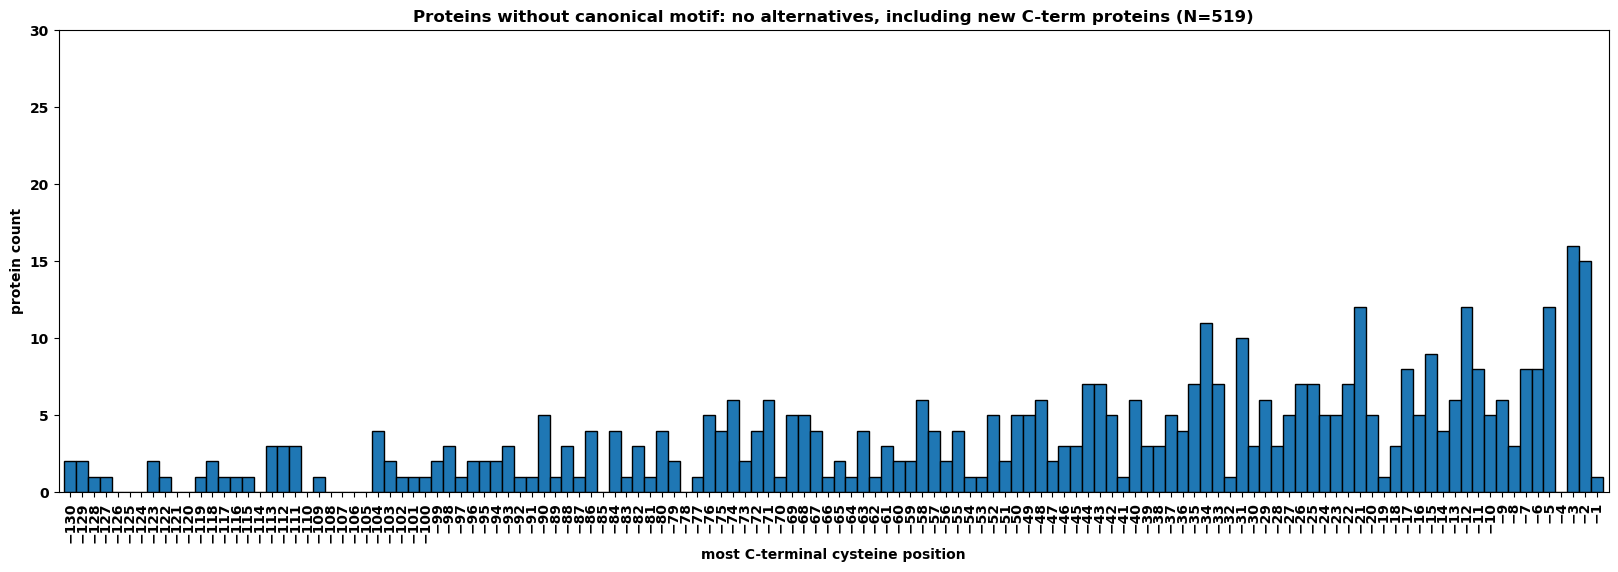

In [62]:
# Histogram of one most C-terminal cysteine position per protein, no alternatives + New C-terminal motifs

# Cpos is the most C-terminal cysteine
pos = no_canon_motif['Cpos'].tolist()

# Filter data within the range from -30 to -1
filtered_data = [x for x in pos if -130 <= x <= -1]

# Specify the desired bin edges
bin_edges = list(range(-130, 1))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('most C-terminal cysteine position')
plt.ylabel('protein count')
plt.title(f'Proteins without canonical motif: no alternatives, including new C-term proteins (N={len(pos)})')

# Set custom x-tick values and labels
plt.xticks(range(-130, 0))
plt.xticks(rotation=90)

# Set x-axis limits to match the data range
plt.xlim(-131, 0)
plt.ylim(0, 30)

plt.show()

## Internal motifs

In [63]:
# Proteins with no canonical motif (found_canon) or new C-term motif (found_newCterm) in canonical sequence or isoform

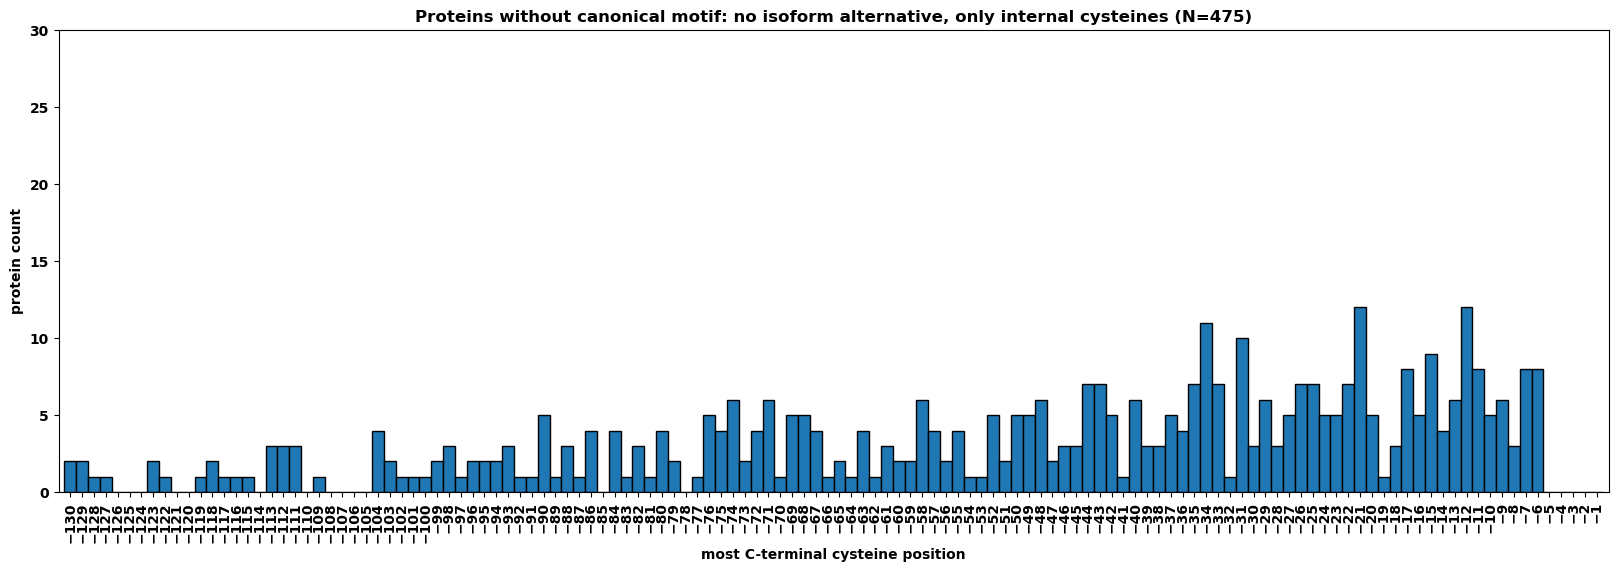

In [64]:
# Histogram of one most C-terminal cysteine position per protein, no sequence alternative, only internal cysteines

# Cpos is the most C-terminal cysteine
pos = found_internal['Cpos'].tolist()

# Filter data within the range from -30 to -1
filtered_data = [x for x in pos if -130 <= x <= -1]

# Specify the desired bin edges
bin_edges = list(range(-130, 1))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('most C-terminal cysteine position')
plt.ylabel('protein count')
plt.title(f'Proteins without canonical motif: no isoform alternative, only internal cysteines (N={len(pos)})')

# Set custom x-tick values and labels
plt.xticks(range(-130, 0))
plt.xticks(rotation=90)

# Set x-axis limits to match the data range
plt.xlim(-131, 0)
plt.ylim(0, 30)

plt.show()

### Excursion most N-terminal cysteine positions of internally prenylated proteins

In [65]:
# get the position of the most N-terminal cysteine per protein
found_internal['Npos'] = found_internal['seq'].apply(lambda x: int(x.find('C') + 1))

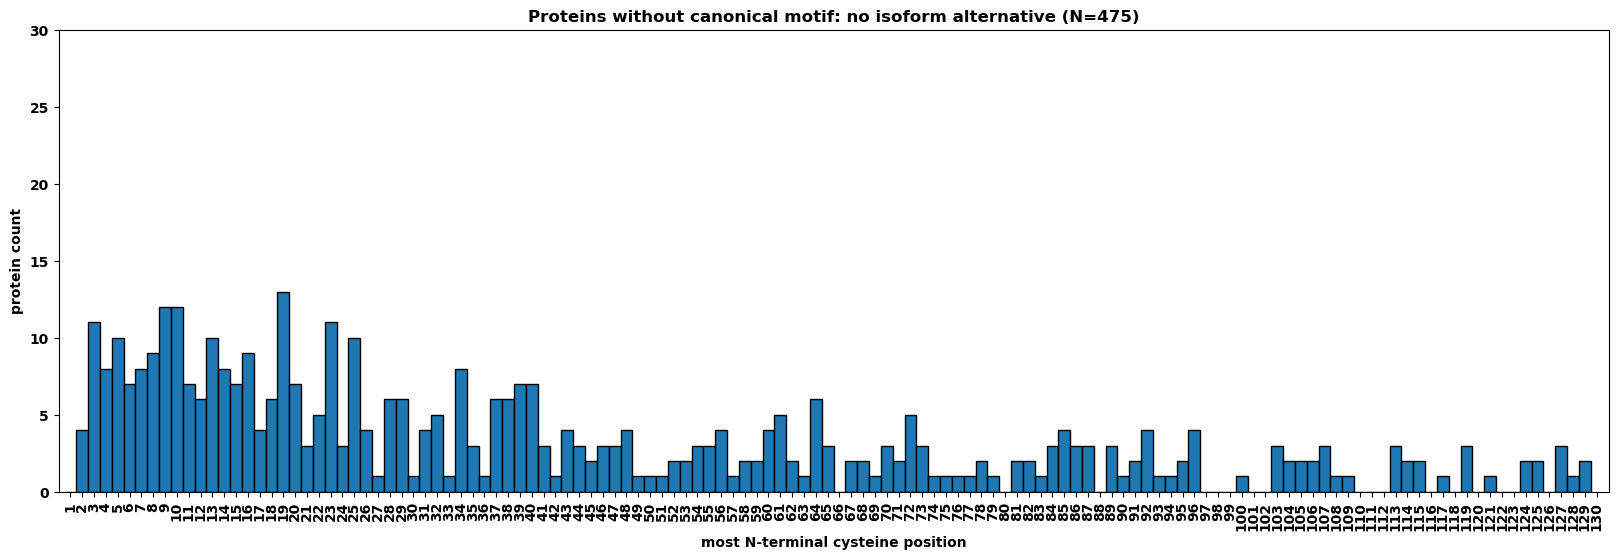

In [66]:
# Histogram of one most N-terminal cysteine position per protein, internal

pos = found_internal['Npos']

# Filter data within the range from 0 to 130
filtered_data = [x for x in pos if 0 <= x < 131]

# Specify the desired bin edges
bin_edges = list(range(1, 131))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('most N-terminal cysteine position')
plt.ylabel('protein count')
plt.title(f'Proteins without canonical motif: no isoform alternative (N={len(pos)})')

# Set custom x-tick values and labels
plt.xticks(range(1, 131))
plt.xticks(rotation=90)

# Set x-axis limits to match the data range
plt.xlim(0, 131)
plt.ylim(0, 30)

plt.show()

In [67]:
# comparison with background

## Save fasta file with correct actualized isoforms and motif information

In [68]:
# Recap
print('Canonical motif:', len(found_canon), ', New-C-terminal motif:', len(found_newCterm), ', Internal cysteines:', len(found_internal))
print('Total:', len(found_canon)+ len(found_newCterm)+ len(found_internal))

Canonical motif: 117 , New-C-terminal motif: 44 , Internal cysteines: 475
Total: 636


In [69]:
# drop now unnecessary N-pos column
found_internal = found_internal.drop(columns=['Npos'])

In [70]:
# add pep column for C-terminal peptides
pep_Cterm(found_canon)
pep_Cterm(found_newCterm)
found_internal['pep'] = np.nan

In [71]:
# add name column from Uniprot info
found_canon = found_canon.merge(all_found[['ID', 'name']], on='ID', how='left')
found_newCterm = found_newCterm.merge(all_found[['ID', 'name']], on='ID', how='left')
found_internal = found_internal.merge(all_found[['ID', 'name']], on='ID', how='left')

In [72]:
# Reorder the columns to place 'name' as the second column
columns_order = ['ID', 'name'] + [col for col in found_canon.columns if col not in ['ID', 'name']]

found_canon = found_canon[columns_order]
found_newCterm = found_newCterm[columns_order]
found_internal = found_internal[columns_order]

In [73]:
# merge all three gourps to one df
fasta = pd.concat([found_canon, found_newCterm, found_internal], ignore_index=True)

In [74]:
# Update cysteine position to match motif
fasta['Cpos'] = None

for i, motif in enumerate(fasta['motif']):
    
    if motif == 'CAAX' or motif == 'CXXX':
        fasta.at[i, 'Cpos'] = -4
        
    elif motif == 'CXC':
        fasta.at[i, 'Cpos'] = [-3, -1]
        
    elif motif == 'CCX':
        fasta.at[i, 'Cpos'] = [-3, -2]
        
    elif motif == 'CC':
        fasta.at[i, 'Cpos'] = [-2, -1]
        
    elif motif == 'C':
        fasta.at[i, 'Cpos'] = -1
        
    elif motif == 'CX':
        fasta.at[i, 'Cpos'] = -2

    elif motif == 'CXX':
        fasta.at[i, 'Cpos'] = -3
        
    elif motif == 'CXXXX':
        fasta.at[i, 'Cpos'] = -5

    elif motif == 'CCC':
        fasta.at[i, 'Cpos'] = [-3, -2, -1]

In [75]:
# save
fasta.to_csv(os.path.join(datafolder, 'identified_proteins', 'final_fasta_seqs_identified_prots.csv'), sep=',', index=False)

In [76]:
fasta.columns

Index(['ID', 'name', 'seqID', 'seq', 'len', 'Ccount', 'Cpos', 'motif', 'pep'], dtype='object')

## Update master file

In [77]:
# Add all motifs 
master_df['Motif'] = None  # Initialize the new column

# Assign values based on membership in each found DataFrame
master_df.loc[master_df['Protein_ID'].isin(found_canon['ID']), 'Motif'] = 0
master_df.loc[master_df['Protein_ID'].isin(found_newCterm['ID']), 'Motif'] = 1
master_df.loc[master_df['Protein_ID'].isin(found_internal['ID']), 'Motif'] = 2

In [78]:
# Add motif column with cysteine position

# Define motifs for Known and New
known_motifs = ["CAAX", "CXXX", "CXC", "CCX", "CC", "C"]
new_motifs = ["CXXXX", "CXX", "CX", "CCC"]

# Initialize Known Motif columns
for motif in known_motifs:
    master_df[f"Known_Motif_{motif}"] = np.nan

# Initialize New Motif columns
for motif in new_motifs:
    master_df[f"New_Motif_{motif}"] = np.nan
    
# Create a lookup dictionary from fasta
fasta_dict = fasta.set_index('ID')[['motif', 'Cpos']].to_dict('index')

# Populate Known and New Motif columns dynamically
for motif in known_motifs + new_motifs:
    if motif in known_motifs:
        column_name = f"Known_Motif_{motif}"
    elif motif in new_motifs:
        column_name = f"New_Motif_{motif}"
    
    # Populate the column
    master_df[column_name] = master_df['Protein_ID'].apply(
        lambda pid: fasta_dict[pid]['Cpos'] if pid in fasta_dict and fasta_dict[pid]['motif'] == motif else np.nan
    )

In [79]:
# Update information on sequence isoforms

# Create a dictionary to map Protein_ID to seqID
id_to_pattern = dict(zip(fasta["ID"], fasta["seqID"]))

# Map Protein_ID to seqID in master_df and extract the pattern
master_df["non_canonical_isoform"] = master_df["Protein_ID"].map(id_to_pattern).str.extract(r'-(\d+)\|')

In [80]:
# Save in general folder
master_df.to_csv(os.path.join('..', 'master_df.csv'), sep=',', index=False)

## Add new motif information to dfs of identified proteins

In [81]:
# Replace 'motif' values in 'all_found' with values from 'fasta' based on matching 'ID'
all_found['motif'] = all_found['ID'].map(fasta.set_index('ID')['motif'])
novel_found['motif'] = novel_found['ID'].map(fasta.set_index('ID')['motif'])

# Replace NaN values in 'motif' column with 'internal'
all_found['motif'] = all_found['motif'].fillna('internal')
novel_found['motif'] = novel_found['motif'].fillna('internal')

# save
all_found.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_all_motif.csv'), sep=',', index=False)
novel_found.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_novel_motif.csv'), sep=',', index=False)

In [82]:
# create identified F, GG, F & GG
identified_F = all_found[all_found['Exp_moiety'] == 'S-farnesyl cysteine']
identified_GG = all_found[all_found['Exp_moiety'] == 'S-geranylgeranyl cysteine']
identified_F_GG = all_found[all_found['Exp_moiety'] == '[S-farnesyl cysteine, S-geranylgeranyl cysteine]']

# save
identified_F.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_F.csv'), sep=',', index=False)
identified_GG.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_GG.csv'), sep=',', index=False)
identified_F_GG.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_F_GG.csv'), sep=',', index=False)